## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

reviews_text = reviews[0].astype(str);
X_trainval, X_test, y_trainval, y_test = train_test_split(reviews_text, Y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=42)

cv = CountVectorizer(max_features=10000)
X_train = cv.fit_transform(X_train)
X_val = cv.transform(X_val)
X_test = cv.transform(X_test)
X_trainval = cv.transform(X_trainval)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


In [2]:
print(X_test)
review_vector = X_test[0]
dense_vector = review_vector.toarray().flatten()
print(dense_vector)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 790980 stored elements and shape (6250, 10000)>
  Coords	Values
  (0, 73)	1
  (0, 93)	1
  (0, 176)	1
  (0, 177)	1
  (0, 216)	1
  (0, 246)	2
  (0, 263)	2
  (0, 305)	1
  (0, 325)	13
  (0, 339)	1
  (0, 369)	1
  (0, 417)	1
  (0, 451)	1
  (0, 546)	1
  (0, 550)	1
  (0, 649)	1
  (0, 650)	1
  (0, 762)	1
  (0, 766)	1
  (0, 775)	1
  (0, 779)	1
  (0, 882)	2
  (0, 1028)	6
  (0, 1104)	1
  (0, 1105)	1
  :	:
  (6249, 8241)	1
  (6249, 8415)	1
  (6249, 8543)	1
  (6249, 8706)	1
  (6249, 8770)	2
  (6249, 8869)	1
  (6249, 8905)	2
  (6249, 8946)	4
  (6249, 8948)	8
  (6249, 8976)	1
  (6249, 8983)	1
  (6249, 8991)	3
  (6249, 8998)	1
  (6249, 9055)	1
  (6249, 9056)	2
  (6249, 9075)	7
  (6249, 9290)	1
  (6249, 9360)	1
  (6249, 9507)	1
  (6249, 9648)	1
  (6249, 9733)	1
  (6249, 9856)	1
  (6249, 9883)	1
  (6249, 9908)	2
  (6249, 9968)	3
[0 0 0 ... 0 0 0]


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping # Added EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

model = Sequential() # initialize a neural network
model.add(Dense(units = 6666, activation='tanh', input_dim=10000)) # add a hidden layer
model.add(Dense(units = 1, activation='sigmoid')) #add the output layer

sgd = SGD(learning_rate = 0.1)
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_data=(X_val, y_val), verbose = 0)

/Users/dimitar.nizamov/pythonenvs/jupyter-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-11 12:18:00.053035: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-11 12:18:00.053095: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-11 12:18:00.053108: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1744366680.053473 34136953 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1744366680.053691 34136953 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/dev

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

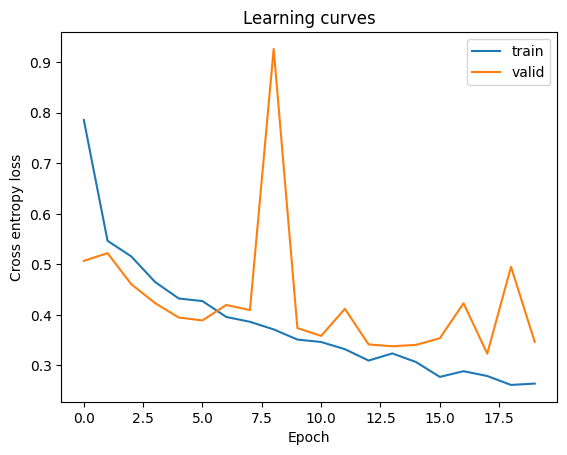

440/440 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9289 - loss: 0.1869
Loss + accuracy on train data: [0.1901160329580307, 0.9288152456283569]
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8618 - loss: 0.3422
Loss + accuracy on test data: [0.33346545696258545, 0.8684800267219543]


In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test)))

In [7]:
test_sentence_positive = [
    "I am think this is good, I am watch with friends, but most of them very liked"
]

test_sentence_negative = [
    "Very bed movie, I am no like"
]

X_pos = cv.transform(test_sentence_positive).toarray()
X_neg = cv.transform(test_sentence_negative).toarray()

y_pos = np.array([[1]], dtype=np.float32)
y_neg = np.array([[0]], dtype=np.float32)

print(X_pos.shape)
print("Loss + accuracy on positive sentence with positive answer: {}".format(model.evaluate(X_pos, y_pos)))
print("Loss + accuracy on negative sentence with negative answer: {}".format(model.evaluate(X_neg, y_neg)))
print("Loss + accuracy on positive sentence with negative answer: {}".format(model.evaluate(X_pos, y_neg)))
print("Loss + accuracy on negative sentence with positive answer: {}".format(model.evaluate(X_neg, y_pos)))

(1, 10000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step - accuracy: 1.0000 - loss: 0.4543
Loss + accuracy on positive sentence with positive answer: [0.4543212950229645, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1072
Loss + accuracy on negative sentence with negative answer: [0.10723313689231873, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 1.0075
Loss + accuracy on positive sentence with negative answer: [1.0075254440307617, 0.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 2.2859
Loss + accuracy on negative sentence with positive answer: [2.2858874797821045, 0.0]
